In [265]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import sympy as sym
from IPython.display import display,Math

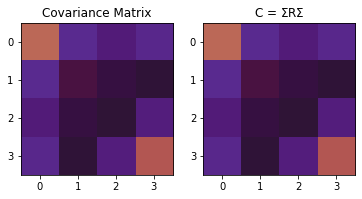

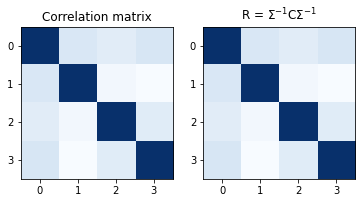

In [602]:
# create random data
M = 4
N = 50
A = np.random.randn(M,N)

# compute covariance and correlation directly
CorrA = np.corrcoef(A)
CovA = np.cov(A,ddof=1)

# compute stds diagonal matrix
std_matrix = np.zeros((M,M))

for i in range(len(A)):
    std = np.std(A[i],ddof=1)
    std_matrix[i,i] = std

# compute covariance from correlation
CovA_rec = std_matrix@CorrA@std_matrix

# compute correlation from covariance
std_inv = np.linalg.inv(std_matrix)
CorrA_rec = std_inv@CovA@std_inv

# plot covariance matrices
plt.subplot(121)
plt.imshow(CovA,cmap='twilight_shifted')
plt.title('Covariance Matrix')

plt.subplot(122)
plt.imshow(CovA_rec,cmap='twilight_shifted')
plt.title('C = $\Sigma$R$\Sigma$')
plt.show()

# display(Math('\\text{Covariance Matrices}'))
# display(Math(sym.latex(sym.sympify(np.round(CovA_rec,8)))))
# display(Math(sym.latex(sym.sympify(np.round(CovA,8)))))

# plot correlation matrices
plt.subplot(121)
plt.imshow(CorrA,cmap='Blues')
plt.title('Correlation matrix')

plt.subplot(122)
plt.imshow(CorrA_rec,cmap='Blues')
plt.title('R = $\Sigma^{-1}$C$\Sigma^{-1}$')
plt.show()

# display(Math('\\text{Correlation Matrices}'))
# display(Math(sym.latex(sym.sympify(np.round(CorrA,8)))))
# display(Math(sym.latex(sym.sympify(np.round(CorrA_rec,8)))))

In [ ]:
Hi Mike! Here is my solution, but I have a question.

I am aware of the computer rounding error, but it makes me doubt the fact that the covariance matrices don't seem to be that similar. For N = 1000, the similarity between both calculations is fair enough, and for N = 10, as you suggested in the video,  the look a little bit similar, but nothing more. Why that is the case? Am I doing something wrong?

About calculating 'R', the correlation, we pre and post multiply sigma^-1 both sides of the equation, wich results in scaling down the covariance matrix by the reciprocal of sigma. I hope I'm conceptually correct :D.

Great code challenge! It's nice to apply some concepts from your linear algebra course. 

In [413]:
print(CovA)
print(CovA_rec)
print(CovA-CovA_rec)

[[ 1.8192829  -0.63082241 -1.04867336  0.52540723]
 [-0.63082241  0.71134573  0.01347483 -0.23038244]
 [-1.04867336  0.01347483  1.2612604  -0.2435966 ]
 [ 0.52540723 -0.23038244 -0.2435966   1.53092504]]
[[ 1.26529009 -0.70162771 -0.87594702  0.39834472]
 [-0.70162771  1.26529009  0.01799992 -0.27933294]
 [-0.87594702  0.01799992  1.26529009 -0.22181044]
 [ 0.39834472 -0.27933294 -0.22181044  1.26529009]]
[[ 0.55399281  0.07080531 -0.17272633  0.1270625 ]
 [ 0.07080531 -0.55394436 -0.00452509  0.0489505 ]
 [-0.17272633 -0.00452509 -0.00402969 -0.02178616]
 [ 0.1270625   0.0489505  -0.02178616  0.26563495]]


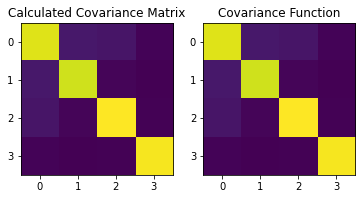

In [424]:
# start with random numbers
N = 4
F = 1000

x = np.random.randn(N,F)

cov_matrix = np.cov(x)
cor_matrix = np.corrcoef(x)
 
sigma_matrix = np.zeros((N,N))
 
for i in range(len(x)):
    std_dev = np.std(x[i],ddof=1)
    sigma_matrix[i,i] = std_dev


calc_cov = np.dot(sigma_matrix,cor_matrix)
calc_cov = np.dot(calc_cov,sigma_matrix)
fig, ax = plt.subplots(1,2)
 
ax[0].imshow(calc_cov)
ax[0].set_title('Calculated Covariance Matrix')
ax[1].imshow(cov_matrix)
ax[1].set_title('Covariance Function')
plt.show()